Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [62]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [95]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

y

array([4, 1, 2, 5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [96]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
𝚽 = PolynomialFeatures(1)
𝚽 = 𝚽.fit_transform(X)
𝚽

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [97]:
from numpy import linalg
# Vaš kôd ovdje
# 1.slučaj -- linalg
w1 = linalg.inv(𝚽.transpose() @ 𝚽) @ (𝚽.transpose() @ y)
print(w1)

# 2.slučaj -- pinv
w2 = linalg.pinv(𝚽) @ y
print(w2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [98]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

x_tilda = np.append([1], X)

h = 𝚽 @ w1
print(h)

E = mean_squared_error(y, h)
print(E)


[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [67]:
# Vaš kôd ovdje

# kad pokrenemo baca gresku pa je zato zakomentirano 
#w = linalg.inv(𝚽.transpose()) @ y
#print(w)

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [102]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(𝚽, y)
coef = reg.coef_
intercept = reg.intercept_

w = []
w.append(intercept)
for i in range(1,len(coef)):
  w.append(coef[i])
print(w)

predict = reg.predict(𝚽)
print(predict)

E = mean_squared_error(y, predict)
print(E)

[2.2, 0.45714285714285713]
[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [69]:
from numpy.random import normal
def make_labels(x, f, noise=0):
    # Vaš kôd ovdje
    y = np.empty(f.shape)
    for i in range (0, f.shape[0]):
      y[i] = f[i] + np.random.normal(np.mean(x), noise)
    return y

In [70]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [71]:
from scipy.sparse.linalg.isolve.lsqr import sqrt
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5

x = make_instances(x1, x2, N)
#print(x)

f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
#print(f)

noise = 200

y = make_labels(x, f, noise)
#print(y)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

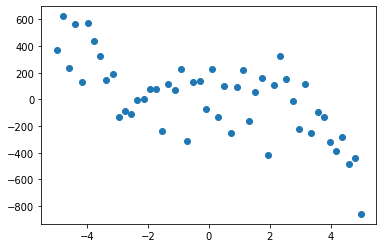

In [72]:
# Vaš kôd ovdje
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

39605.901944796446


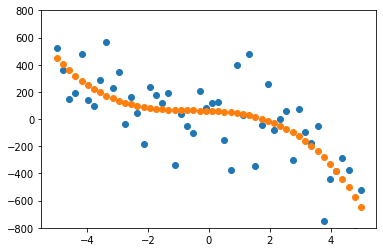

In [73]:
# Vaš kôd ovdje
import numpy as np
import matplotlib.pyplot as plt
N = 50
x1 = -5
x2 = 5
d = 3

x = make_instances(x1, x2, N)
#print(x)

f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 

noise = 200

y = make_labels(x, f, noise)
#print(y)

plt.scatter(x, y)

𝚽 = PolynomialFeatures(d)
𝚽 = 𝚽.fit_transform(x)
w = linalg.pinv(𝚽) @ y
h = 𝚽 @ w

plt.scatter(x, h)
plt.ylim([-800, 800])

E = mean_squared_error(y, h)
print(E)



### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

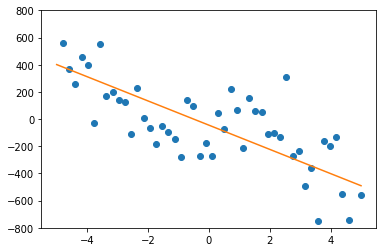

d = 1, E = 52600.39434552453



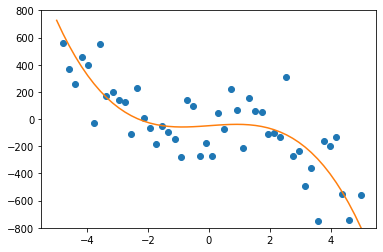

d = 3, E = 34291.84987760681



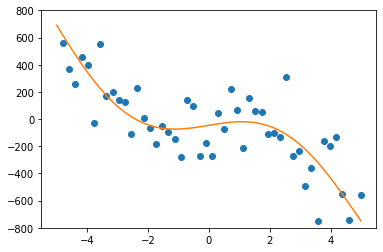

d = 5, E = 33983.90695781847



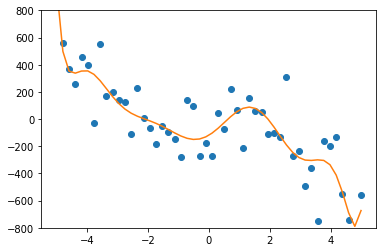

d = 10, E = 27439.56971810795



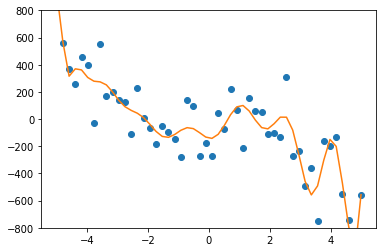

d = 20, E = 18612.65264141344



In [74]:
# Vaš kôd ovdje
import numpy as np
import matplotlib.pyplot as plt
N = 50
x1 = -5
x2 = 5
noise = 200

x = make_instances(x1, x2, N)

d = [1,3,5,10,20]
h = []
E = []

f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
y = make_labels(x, f, noise)

ind = 0
for elem in d:
  𝚽 = PolynomialFeatures(elem)
  𝚽 = 𝚽.fit_transform(x)
  w = linalg.pinv(𝚽) @ y
  h.append(𝚽 @ w)

  E.append(mean_squared_error(y, h[ind]))
  ind += 1

for i in range(0, len(d)):
  plt.figure()
  plt.plot(x,y, 'o')
  plt.plot(x,h[i])
  plt.ylim([-800, 800])
  plt.show()
  print('d = ' + str(d[i]) + ', E = ' + str(E[i]))
  print()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

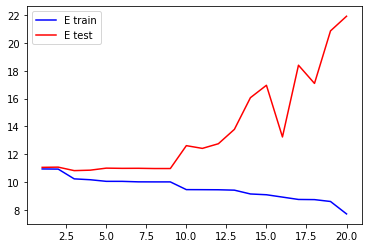

In [75]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5
noise = 200

x = make_instances(x1, x2, N)

f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
y = make_labels(x, f, noise)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

d = []
for i in range(1, 21):
  d.append(i)
E_train = []
E_test = []

for elem in d:
  𝚽 = PolynomialFeatures(elem)
  𝚽1 = 𝚽.fit_transform(X_train)
  𝚽2 = 𝚽.fit_transform(X_test)

  w = linalg.pinv(𝚽1) @ y_train # tezine dobivamo iz X_train i y_train 

  h_train = 𝚽1 @ w 
  h_test = 𝚽2 @ w

  E_train.append(mean_squared_error(y_train, h_train))
  E_test.append(mean_squared_error(y_test, h_test))

plt.figure()
plt.plot(d, np.log(E_train), 'b', label='E train')
plt.plot(d, np.log(E_test), 'r', label='E test')
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

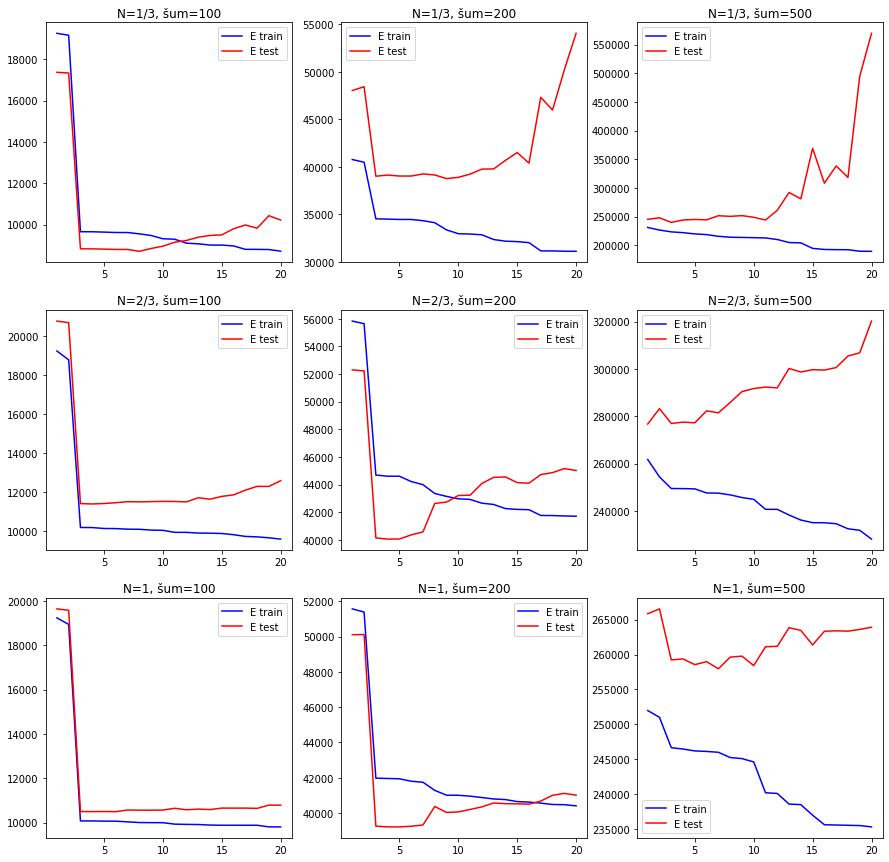

In [76]:
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5
noise = [100, 200, 500]
N = [1/3, 2/3, 1]

x = make_instances(x1, x2, 1000)
X_1, X_2 = train_test_split(x, test_size=0.5, random_state=42)

f = np.empty(X_1.shape)
for i in range(0, X_1.shape[0]):
  f[i] = 5 + X_1[i] - 2*pow(X_1[i], 2) - 5*pow(X_1[i], 3)
y_1 = []
for i in range(len(noise)) :
  y_1.append(make_labels(X_1, f, noise[i]))

f = np.empty(X_2.shape)
for i in range(0, X_2.shape[0]):
  f[i] = 5 + X_2[i] - 2*pow(X_2[i], 2) - 5*pow(X_2[i], 3)
y_2 = [] 
for i in range(len(noise)) :
  y_2.append(make_labels(X_2, f, noise[i]))

# trenutno 6 skupova, svaki treba podijelit na 3 dijela da dobijemo 18 

# od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke.
X_1_13, X_1_23 = train_test_split(X_1, train_size=0.33, random_state=42)
y_1_0_13, y_1_0_23 = train_test_split(y_1[0], train_size=0.33, random_state=42)
y_1_1_13, y_1_1_23 = train_test_split(y_1[1], train_size=0.33, random_state=42)
y_1_2_13, y_1_2_23 = train_test_split(y_1[2], train_size=0.33, random_state=42)

X_2_13, X_2_23 = train_test_split(X_2, train_size=0.33, random_state=42)
y_2_0_13, y_2_0_23 = train_test_split(y_2[0], train_size=0.33, random_state=42)
y_2_1_13, y_2_1_23 = train_test_split(y_2[1], train_size=0.33, random_state=42)
y_2_2_13, y_2_2_23 = train_test_split(y_2[2], train_size=0.33, random_state=42)

# sad imamo 18 skupova, na svaki graf idu 2 --> 9 grafova

# todo: izracunat greske i displayat greske a ne skupove !!!

d = []
for i in range(1, 21):
  d.append(i)

X_list = [X_1_13, X_2_13, X_1_23, X_2_23, X_1, X_2]
y_list = [y_1_0_13, y_2_0_13, y_1_1_13, y_2_1_13, y_1_2_13, y_2_2_13, 
          y_1_0_23, y_2_0_23, y_1_1_23, y_2_1_23, y_1_2_23, y_2_2_23, 
          y_1[0], y_2[0], y_1[1], y_2[1], y_1[2], y_2[2]]
titles = ['N=1/3, šum=100', 'N=1/3, šum=200', 'N=1/3, šum=500', 
          'N=2/3, šum=100', 'N=2/3, šum=200', 'N=2/3, šum=500', 
          'N=1, šum=100', 'N=1, šum=200', 'N=1, šum=500']

E_train_list = []
E_test_list = []

ind_y = 0
ind_x = 0
for i in range(9):
  pom_train = []
  pom_test = []

  for elem in d:
    𝚽 = PolynomialFeatures(elem)
    𝚽1 = 𝚽.fit_transform(X_list[ind_x])
    𝚽2 = 𝚽.fit_transform(X_list[ind_x + 1])

    w = linalg.pinv(𝚽1) @ y_list[ind_y] 

    h_train = 𝚽1 @ w 
    h_test = 𝚽2 @ w

    pom_train.append(mean_squared_error(y_list[ind_y], h_train))
    pom_test.append(mean_squared_error(y_list[ind_y+1], h_test))

  E_train_list.append(pom_train)
  E_test_list.append(pom_test)
  ind_y += 2

  if (i % 3 == 2):
    ind_x += 2


fig, ax = plt.subplots(3, 3, figsize=(15, 15))

ind = 0
for i in range(3):
  for j in range(3):
    ax[i,j].plot(d, E_train_list[ind], 'b', label='E train')
    ax[i,j].plot(d, E_test_list[ind], 'r', label='E test')
    ax[i,j].legend()
    ax[i,j].set_title(titles[ind])
    ind += 1



### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [77]:
# Vaš kôd ovdje
Lambda = [0, 1, 10]
d = 3

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

𝚽 = PolynomialFeatures(d)
𝚽 = 𝚽.fit_transform(X)

for i in range(len(Lambda)):
  w = linalg.inv(𝚽.transpose() @ 𝚽 + Lambda[i] * np.identity(4)) @ (𝚽.transpose() @ y)
  print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [78]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
Lambda = [0, 1, 10]
d = 3

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

𝚽 = PolynomialFeatures(d)
𝚽 = 𝚽.fit_transform(X)

for i in range(len(Lambda)):
  w = []
  reg = Ridge(Lambda[i]).fit(𝚽 , y)
  w.append(reg.intercept_)
  for i in range(1, len(reg.coef_)):
    w.append(reg.coef_[i])
  print(w)


[4.000000000000028, -5.916666666666732, 3.375000000000027, -0.4583333333333364]
[3.0569614512471652, -0.6907936507936514, -0.283174603174602, 0.1445804988662129]
[2.4944418431229725, -0.1589729487341473, -0.13423066536848305, 0.08156009919705869]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

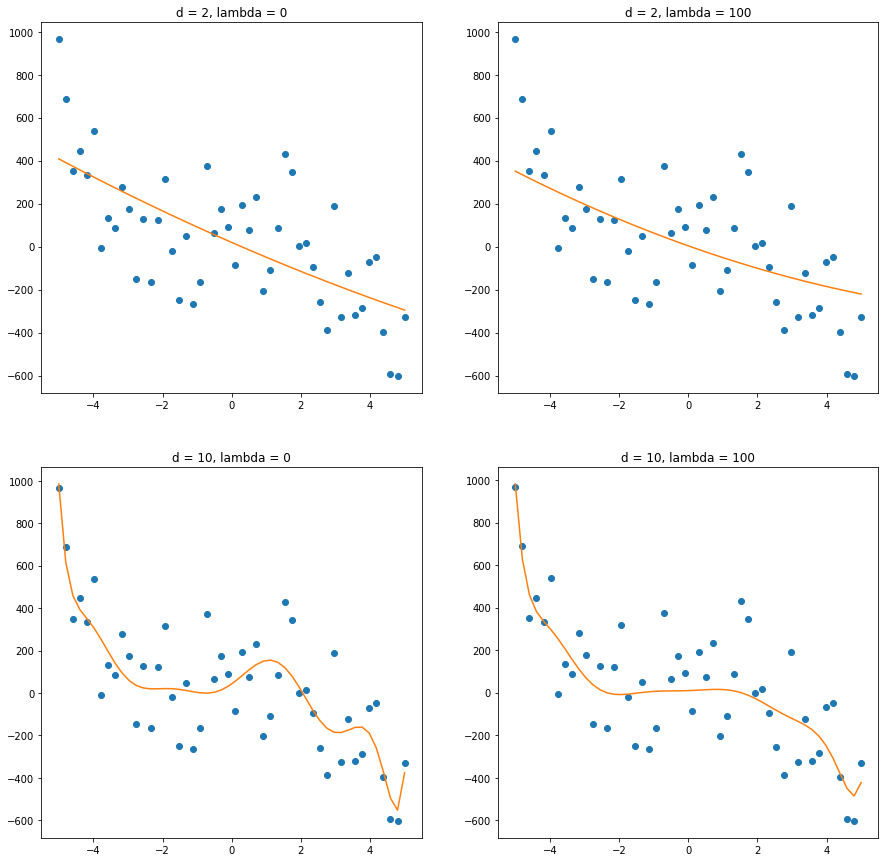

In [79]:
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5
noise = 200
Lambda = [0, 100]
d = [2, 10]

x = make_instances(x1, x2, N)
f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
y = make_labels(x, f, noise)

h_list = []
d_list = []
Lambda_list = [] 

for elem in d:
  𝚽 = PolynomialFeatures(elem)
  𝚽 = 𝚽.fit_transform(x)

  for i in range(len(Lambda)):
    w = linalg.inv(𝚽.transpose() @ 𝚽 + Lambda[i] * np.identity(elem+1)) @ (𝚽.transpose() @ y)
    h = 𝚽 @ w

    h_list.append(h)
    d_list.append(elem)
    Lambda_list.append(Lambda[i])

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ind = 0
for i in range(2):
  for j in range(2):
    ax[i,j].plot(x, y, 'o')
    ax[i,j].plot(x, h_list[ind])
    ax[i,j].set_title('d = {0}, lambda = {1}'.format(d_list[ind], Lambda_list[ind]))
    ind += 1


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


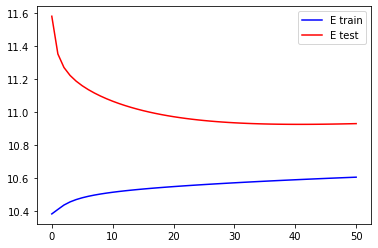

In [80]:
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5
noise = 200
d = 10

x = make_instances(x1, x2, N)
f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
y = make_labels(x, f, noise)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

Lambda = []
for i in range(0, 51):
  Lambda.append(i)
E_train = []
E_test = []


𝚽 = PolynomialFeatures(d)
𝚽1 = 𝚽.fit_transform(X_train)
𝚽2 = 𝚽.fit_transform(X_test)

for i in range(len(Lambda)):
  w = linalg.inv(𝚽1.transpose() @ 𝚽1 + Lambda[i] * np.identity(elem+1)) @ (𝚽1.transpose() @ y_train)
  h_train = 𝚽1 @ w
  h_test = 𝚽2 @ w

  E_train.append(mean_squared_error(y_train, h_train))
  E_test.append(mean_squared_error(y_test, h_test))

plt.figure()
plt.plot(Lambda, np.log(E_train), 'b', label='E train')
plt.plot(Lambda, np.log(E_test), 'r', label='E test')
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [81]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

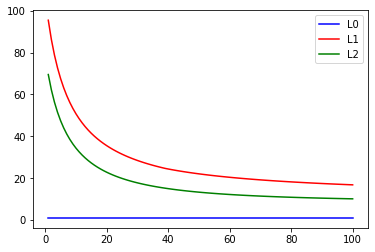

In [82]:
from sklearn.linear_model import Ridge
from numpy.linalg import norm
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5
noise = 200
d = 5

x = make_instances(x1, x2, N)
f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
y = make_labels(x, f, noise)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
Lambda = []
for i in range(1, 101):
  Lambda.append(i)

L0 = []
L1 = []
L2 = []


𝚽 = PolynomialFeatures(d)
𝚽1 = 𝚽.fit_transform(X_train)
𝚽2 = 𝚽.fit_transform(X_test)

for i in range(len(Lambda)):
  reg = Ridge(Lambda[i]).fit(X_train, y_train)
  coef = reg.coef_
  L0.append(nonzeroes(coef))

  w = linalg.inv(𝚽1.transpose() @ 𝚽1 + Lambda[i] * np.identity(d+1)) @ (𝚽1.transpose() @ y_train)
  L1.append(norm(w, 1))

  
  l2 = np.sqrt(w.transpose() @ w)
  L2.append(l2[0])

plt.figure()
plt.plot(Lambda, L0, 'b', label='L0')
plt.plot(Lambda, L1, 'r', label='L1')
plt.plot(Lambda, L2, 'g', label='L2')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

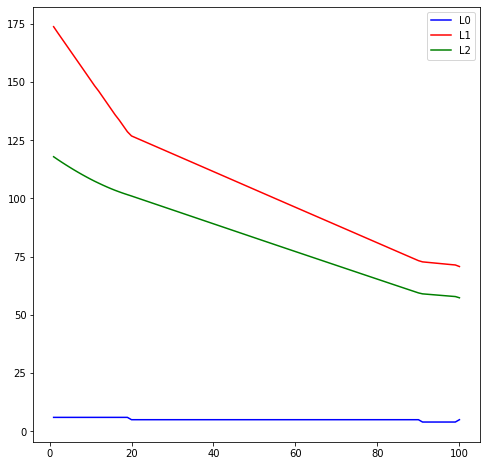

In [83]:
from sklearn.linear_model import Lasso
from numpy.linalg import norm
# Vaš kôd ovdje
N = 50
x1 = -5
x2 = 5
noise = 200
d = 5

x = make_instances(x1, x2, N)
f = np.empty(x.shape)
for i in range(0, x.shape[0]):
  f[i] = 5 + x[i] - 2*pow(x[i], 2) - 5*pow(x[i], 3) 
y = make_labels(x, f, noise)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
Lambda = []
for i in range(1, 101):
  Lambda.append(i)

L0 = []
L1 = []
L2 = []

𝚽 = PolynomialFeatures(d)
𝚽 = 𝚽.fit_transform(X_train)

for i in range(len(Lambda)):
  reg = Lasso(Lambda[i]).fit(𝚽, y_train)
  w = np.concatenate((reg.intercept_, reg.coef_[1:]))
  
  L0.append(nonzeroes(w))
  L1.append(norm(w, 1))
  L2.append(np.sqrt(w.transpose() @ w))


plt.figure(figsize=(8,8))
plt.plot(Lambda, L0, 'b', label='L0')
plt.plot(Lambda, L1, 'r', label='L1')
plt.plot(Lambda, L2, 'g', label='L2')
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [84]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

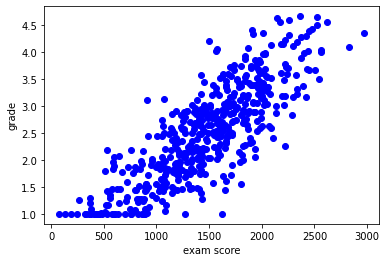

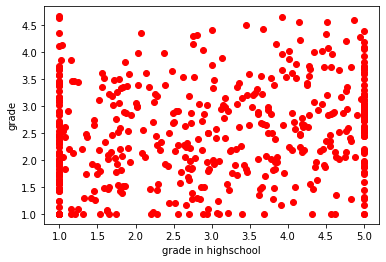

In [85]:
# Vaš kôd ovdje
plt.figure()
plt.plot(exam_score, grades_y, 'bo')
plt.xlabel('exam score')
plt.ylabel('grade')
plt.show()

plt.figure()
plt.plot(grade_in_highschool, grades_y, 'ro')
plt.xlabel('grade in highschool')
plt.ylabel('grade')
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [86]:
# Vaš kôd ovdje
reg = Ridge(0.01).fit(grades_X, grades_y)
print(reg.coef_)
print(reg.intercept_)

[0.00141497 0.09477276]
0.15061179575776018


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [87]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler().fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)
grades_y = grades_y.reshape(-1, 1)
scaler = StandardScaler().fit(grades_y)
grades_y_fixed = scaler.transform(grades_y)


reg = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)
print(reg.coef_)
print(reg.intercept_)

[[0.81630375 0.15167761]]
[8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *6b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [88]:
# Vaš kôd ovdje
lista = []
for i in range(grades_X_fixed.shape[0]):
  pom = []
  pom.append(grades_X_fixed[i][0])
  pom.append(grades_X_fixed[i][1])
  pom.append(grades_X_fixed[i][1])

  lista.append(pom)

grades_X_fixed_colinear = np.array(lista)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [89]:
# Vaš kôd ovdje
reg = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(reg.coef_)
print(reg.intercept_)

[[0.81630364 0.07583957 0.07583957]]
[8.07031579e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *6b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [90]:
import statistics
# Vaš kôd ovdje
reg1_coef_list = []
reg2_coef_list = []
reg1_intercept_list = []
reg2_intercept_list = []
for i in range(10):
  grades_X_fixed_colinear_1, grades_X_fixed_colinear_2, grades_y_fixed_1, grades_y_fixed_2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5)
  
  reg1 = Ridge(0.01).fit(grades_X_fixed_colinear_1, grades_y_fixed_1)
  reg1_coef_list.append(reg1.coef_)
  reg1_intercept_list.append(reg1.intercept_)

  reg2 = Ridge(1000).fit(grades_X_fixed_colinear_2, grades_y_fixed_2)
  reg2_coef_list.append(reg2.coef_)
  reg2_intercept_list.append(reg2.intercept_)

print(np.array(reg1_coef_list))
print()
print()
print(np.array(reg2_coef_list))
print()
print()
print(np.array(reg1_intercept_list))
print()
print()
print(np.array(reg2_intercept_list))
print()
print()

lista_w1_lambda1 = [] # lambda1 = 0.01
lista_w2_lambda1 = []
lista_w3_lambda1 = []
lista_w1_lambda2 = [] # lambda2 = 1000
lista_w2_lambda2 = []
lista_w3_lambda2 = []
for i in range(10):
  lista_w1_lambda1.append(reg1_coef_list[i][0][0])
  lista_w2_lambda1.append(reg1_coef_list[i][0][1])
  lista_w3_lambda1.append(reg1_coef_list[i][0][2])
  lista_w1_lambda2.append(reg2_coef_list[i][0][0])
  lista_w2_lambda2.append(reg2_coef_list[i][0][1])
  lista_w3_lambda2.append(reg2_coef_list[i][0][2])

print(statistics.stdev(lista_w1_lambda1))
print(statistics.stdev(lista_w2_lambda1))
print(statistics.stdev(lista_w3_lambda1))
print(statistics.stdev(lista_w1_lambda2))
print(statistics.stdev(lista_w2_lambda2))
print(statistics.stdev(lista_w3_lambda2))


[[[0.79385128 0.06504303 0.06504303]]

 [[0.80739011 0.0761075  0.0761075 ]]

 [[0.814158   0.07673386 0.07673386]]

 [[0.83265053 0.07483515 0.07483515]]

 [[0.79735626 0.08013669 0.08013669]]

 [[0.81845427 0.04525193 0.04525193]]

 [[0.80086373 0.0614553  0.0614553 ]]

 [[0.81216485 0.06648337 0.06648337]]

 [[0.81501911 0.04444567 0.04444567]]

 [[0.81925961 0.07443972 0.07443972]]]


[[[0.16419725 0.02816756 0.02816756]]

 [[0.16837778 0.04200572 0.04200572]]

 [[0.16675609 0.03992155 0.03992155]]

 [[0.16232085 0.03253696 0.03253696]]

 [[0.17099764 0.03987356 0.03987356]]

 [[0.15003014 0.03454006 0.03454006]]

 [[0.17269709 0.04318487 0.04318487]]

 [[0.1670921  0.0357689  0.0357689 ]]

 [[0.16044761 0.05071806 0.05071806]]

 [[0.16131422 0.03525785 0.03525785]]]


[[-0.01045662]
 [ 0.02152062]
 [ 0.00921447]
 [-0.01820559]
 [ 0.01261939]
 [ 0.00283109]
 [-0.04553636]
 [ 0.00861207]
 [-0.01197704]
 [-0.01779144]]


[[ 0.02408101]
 [-0.03106416]
 [ 0.02709743]
 [ 0.04983691]
 [ 

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.